In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from numpy import sqrt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#Cargar la data
df=pd.read_csv('../data/processed/Airbnb_Data_Processed_3_Models.csv')
df.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,host_has_profile_pic,host_identity_verified,...,wheelchair_accessible,wide_clearance_to_bed,wide_clearance_to_shower_&_toilet,wide_clearance_to_shower_and_toilet,wide_doorway,wide_entryway,wide_hallway_clearance,window_guards,wireless_internet,smooth_pathway_to_front_door
0,5.010635,0,0,3,1.0,4,2,True,1,1,...,0,0,0,0,0,0,0,0,1,0
1,5.129899,0,0,7,1.0,4,2,True,1,0,...,0,0,0,0,0,0,0,0,1,0
2,4.976734,0,0,5,1.0,4,1,True,1,1,...,0,0,0,0,0,0,0,0,1,0
3,6.620073,17,0,4,1.0,4,0,True,1,1,...,0,0,0,0,0,0,0,0,1,0
4,4.744932,0,0,2,1.0,4,1,True,1,1,...,0,0,0,0,0,0,0,0,1,0


In [3]:
#Ver los tipos de datos unicos
df.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('bool')], dtype=object)

In [4]:
#Convertir los booleanos a enteros para evitar problemas con los modelos
#Ver columnas con booleanos
df.select_dtypes(include='bool').columns

Index(['cleaning_fee', 'instant_bookable'], dtype='object')

In [5]:
#Convertir los booleanos a enteros
df['cleaning_fee'] = df['cleaning_fee'].astype(int)
df['instant_bookable'] = df['instant_bookable'].astype(int)

In [6]:
#Hacer un split de df de test y train. Lo que se busca predecir es la columna 'log_price'
X = df.drop(['log_price'], axis=1)
y = df['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
#No existe escalado ya que ninguna feature usada es sensible a la escala, ya que son variables categóricas o limitadas como
#el rate, el número de baños, el tipo de cama, etc.

#Uso de PCA para reducir la dimensionalidad, manteniendo el 99% de la varianza
print('Numero de features antes de PCA:', X_train.shape[1])
pca = PCA(n_components=0.999, svd_solver='full')
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print('Numero de features antes de PCA:',pca.n_components_)

#Escalar los resultados de PCA
scaler2=StandardScaler()
X_train_pca=scaler2.fit_transform(X_train_pca)
X_test_pca=scaler2.transform(X_test_pca)

Numero de features antes de PCA: 146
Numero de features antes de PCA: 15


In [7]:
#Función para obtener los scores de los modelos
#MSE, RMSE, R2, MAE
def get_scores( y_train, y_test, y_pred_train, y_pred_test):

    #MSE
    MSE_train = mean_squared_error(y_train, y_pred_train)
    MSE_test = mean_squared_error(y_test, y_pred_test)
    #RMSE
    RMSE_train = sqrt(mean_squared_error(y_train, y_pred_train))
    RMSE_test = sqrt(mean_squared_error(y_test, y_pred_test))
    #R2
    R2_train = r2_score(y_train, y_pred_train)
    R2_test = r2_score(y_test, y_pred_test)
    #MAE
    MAE_train = mean_absolute_error(y_train, y_pred_train)
    MAE_test = mean_absolute_error(y_test, y_pred_test)
    salida={'MSE_train':MSE_train, 'MSE_test':MSE_test, 'RMSE_train':RMSE_train, 'RMSE_test':RMSE_test,\
        'R2_train':R2_train, 'R2_test':R2_test, 'MAE_train':MAE_train, 'MAE_test':MAE_test}
    return salida


In [ ]:
import sys
import os

# Añadir el directorio raíz del proyecto a sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
#Importar los modelos de models.py

from models.models import LinearRegressionNormalEquation, LinearRegressionSklearn, LinearRegressionSVD,\
    PolynomialRegression, LinearRegressionBatchGradientDescent,LinearRegressionBGDSklearn, LinearRegressionStochasticGradientDescent,\
    LinearRegressionSGDSklearn, RidgeRegression,LassoRegression    

In [9]:
#Entrenar con LinearRegressionNormalEquation (implementacion manual)
model1 = LinearRegressionNormalEquation()
model1.fit(X_train_pca, y_train)
y_pred_train = model1.predict(X_train_pca)
y_pred_test = model1.predict(X_test_pca)
scores1 = get_scores(y_train, y_test, y_pred_train, y_pred_test)
print('LinearRegressionNormalEquation')
print(scores1)

LinearRegressionNormalEquation
{'MSE_train': 0.2642919743792231, 'MSE_test': 0.2686556764353474, 'RMSE_train': 0.5140933518138735, 'RMSE_test': 0.5183200521254675, 'R2_train': 0.48656752502012834, 'R2_test': 0.47728707181472874, 'MAE_train': 0.39138903746049625, 'MAE_test': 0.39398939729663235}


In [10]:
#Entrenar con LinearRegressionSklearn
model2 = LinearRegressionSklearn()
model2.fit(X_train_pca, y_train)
y_pred_train = model2.predict(X_train_pca)
y_pred_test = model2.predict(X_test_pca)
scores2 = get_scores(y_train, y_test, y_pred_train, y_pred_test)
print('LinearRegressionSklearn')
print(scores2)

LinearRegressionSklearn
{'MSE_train': 0.2642919743792231, 'MSE_test': 0.26865567643534743, 'RMSE_train': 0.5140933518138735, 'RMSE_test': 0.5183200521254676, 'R2_train': 0.48656752502012834, 'R2_test': 0.4772870718147286, 'MAE_train': 0.3913890374604962, 'MAE_test': 0.3939893972966323}


In [11]:
#Entrenar con LinearRegressionSVD
model3 = LinearRegressionSVD()

model3.fit(X_train_pca, y_train)
y_pred_train = model3.predict(X_train_pca)
y_pred_test = model3.predict(X_test_pca)
scores3 = get_scores(y_train, y_test, y_pred_train, y_pred_test)
print('LinearRegressionSVD')
print(scores3)

LinearRegressionSVD
{'MSE_train': 0.2642919743792231, 'MSE_test': 0.26865567643534743, 'RMSE_train': 0.5140933518138735, 'RMSE_test': 0.5183200521254676, 'R2_train': 0.48656752502012834, 'R2_test': 0.4772870718147286, 'MAE_train': 0.39138903746049625, 'MAE_test': 0.39398939729663235}


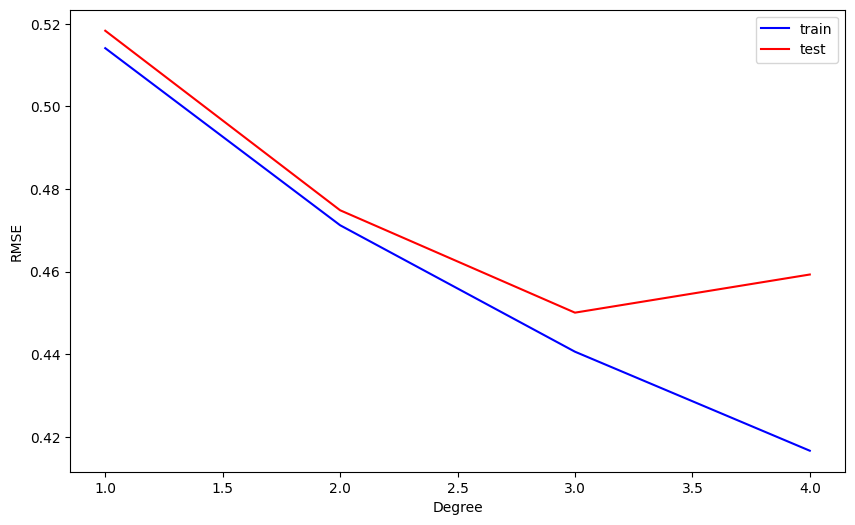

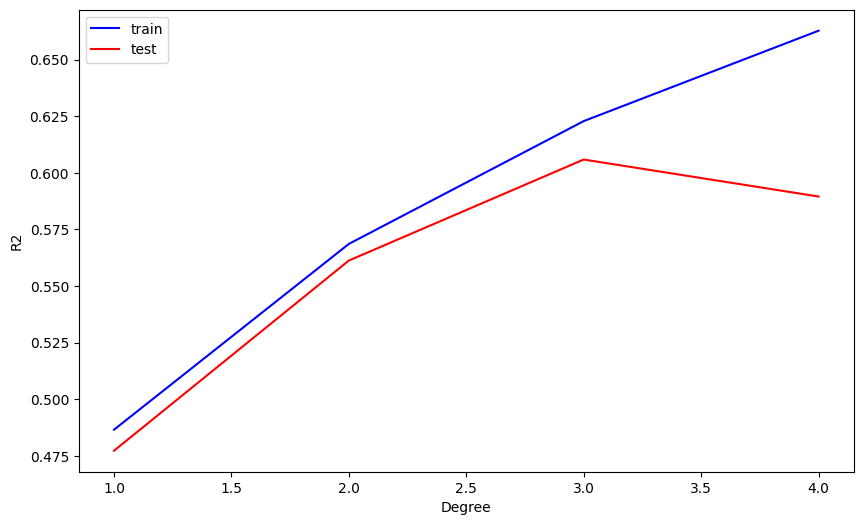

In [12]:
#Entrenar con PolynomialRegression, gráfica de grado vs RMSE para ver overfitting
degrees = np.arange(1, 5)
train_error = np.empty(len(degrees))
test_error = np.empty(len(degrees))
train_error_r2 = np.empty(len(degrees))
test_error_r2 = np.empty(len(degrees))
for i, degree in enumerate(degrees):
    model = PolynomialRegression(degree=degree)
    model.fit(X_train_pca, y_train)
    y_pred_train = model.predict(X_train_pca)
    y_pred_test = model.predict(X_test_pca)
    train_error[i] = sqrt(mean_squared_error(y_train, y_pred_train))
    test_error[i] = sqrt(mean_squared_error(y_test, y_pred_test))
    train_error_r2[i] = r2_score(y_train, y_pred_train)
    test_error_r2[i] = r2_score(y_test, y_pred_test)
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_error, color='blue', label='train')
plt.plot(degrees, test_error, color='red', label='test')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.legend()
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_error_r2, color='blue', label='train')
plt.plot(degrees, test_error_r2, color='red', label='test')
plt.xlabel('Degree')
plt.ylabel('R2')
plt.legend()
plt.show()

In [13]:
#Seleccionar el grado antes del overfitting, en este caso grado 3
model4 = PolynomialRegression(degree=3)
model4.fit(X_train_pca, y_train)
y_pred_train = model4.predict(X_train_pca)
y_pred_test = model4.predict(X_test_pca)
scores4 = get_scores(y_train, y_test, y_pred_train, y_pred_test)
print('PolynomialRegression')
print(scores4)

PolynomialRegression
{'MSE_train': 0.19414432519519673, 'MSE_test': 0.2025642512937204, 'RMSE_train': 0.4406181171890197, 'RMSE_test': 0.450071384664389, 'R2_train': 0.6228413608759846, 'R2_test': 0.60587859395229, 'MAE_train': 0.33187669839252065, 'MAE_test': 0.33883248660835213}


In [14]:
#Entrenar con LinearRegressionBatchGradientDescent
model5 = LinearRegressionBatchGradientDescent( 0.01,10000)
model5.fit(X_train_pca, y_train)
y_pred_train = model5.predict(X_train_pca)
y_pred_test = model5.predict(X_test_pca)
scores5 = get_scores(y_train, y_test, y_pred_train, y_pred_test)
print('LinearRegressionBatchGradientDescent')
print(scores5)


LinearRegressionBatchGradientDescent
{'MSE_train': 0.26429197437922297, 'MSE_test': 0.2686556764353477, 'RMSE_train': 0.5140933518138734, 'RMSE_test': 0.5183200521254678, 'R2_train': 0.48656752502012857, 'R2_test': 0.47728707181472807, 'MAE_train': 0.3913890374604943, 'MAE_test': 0.39398939729663046}


In [15]:
#Entrenar con LinearRegressionBGDSklearn
model6 = LinearRegressionBGDSklearn(0.01,10000)
model6.fit(X_train_pca, y_train)
y_pred_train = model6.predict(X_train_pca)
y_pred_test = model6.predict(X_test_pca)
scores6 = get_scores(y_train, y_test, y_pred_train, y_pred_test)
print('LinearRegressionBGDSklearn')
print(scores6)

LinearRegressionBGDSklearn
{'MSE_train': 0.3225224283473758, 'MSE_test': 0.3283033059505958, 'RMSE_train': 0.5679105812954851, 'RMSE_test': 0.5729775789248615, 'R2_train': 0.37344488415941324, 'R2_test': 0.36123299286535304, 'MAE_train': 0.44164012579796275, 'MAE_test': 0.4443653788351381}


In [16]:
#Entrenar con LinearRegressionStochasticGradientDescent
model7 = LinearRegressionStochasticGradientDescent(0.001,10000)
model7.fit(X_train_pca, y_train)
y_pred_train = model7.predict(X_train_pca)
y_pred_test = model7.predict(X_test_pca)
scores7 = get_scores(y_train, y_test, y_pred_train, y_pred_test)
print('LinearRegressionStochasticGradientDescent')
print(scores7)

LinearRegressionStochasticGradientDescent
{'MSE_train': 0.26655570193031036, 'MSE_test': 0.27108198230672503, 'RMSE_train': 0.516290327170973, 'RMSE_test': 0.5206553392665104, 'R2_train': 0.482169846119871, 'R2_test': 0.47256630259991506, 'MAE_train': 0.39372798775297907, 'MAE_test': 0.39678221341113695}


In [17]:
#Entrenar con LinearRegressionSGDSklearn
model8 = LinearRegressionSGDSklearn(0.001,1000)#Las 10000 iteraciones podrían contener
#más de 100000 actualizaciones de pesos por como está implementado el algoritmo en sklearn
model8.fit(X_train_pca, y_train)
y_pred_train = model8.predict(X_train_pca)
y_pred_test = model8.predict(X_test_pca)
scores8 = get_scores(y_train, y_test, y_pred_train, y_pred_test)
print('LinearRegressionSGDSklearn')
print(scores8)

LinearRegressionSGDSklearn
{'MSE_train': 0.2661320670462397, 'MSE_test': 0.27003509819381616, 'RMSE_train': 0.5158798959508305, 'RMSE_test': 0.5196490144259067, 'R2_train': 0.4829928295174073, 'R2_test': 0.47460318440859295, 'MAE_train': 0.39184061124656233, 'MAE_test': 0.3939703165192586}


[1.00000000e-03 2.63665090e-03 6.95192796e-03 1.83298071e-02
 4.83293024e-02 1.27427499e-01 3.35981829e-01 8.85866790e-01
 2.33572147e+00 6.15848211e+00 1.62377674e+01 4.28133240e+01
 1.12883789e+02 2.97635144e+02 7.84759970e+02 2.06913808e+03
 5.45559478e+03 1.43844989e+04 3.79269019e+04 1.00000000e+05]


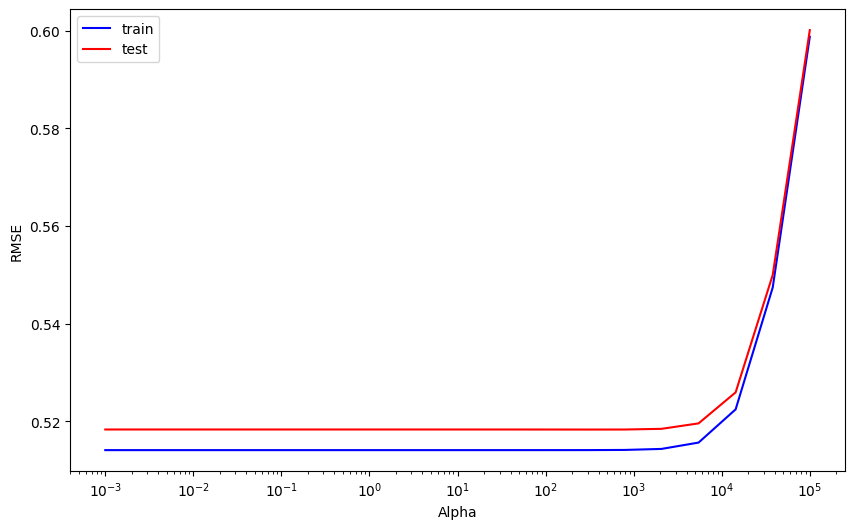

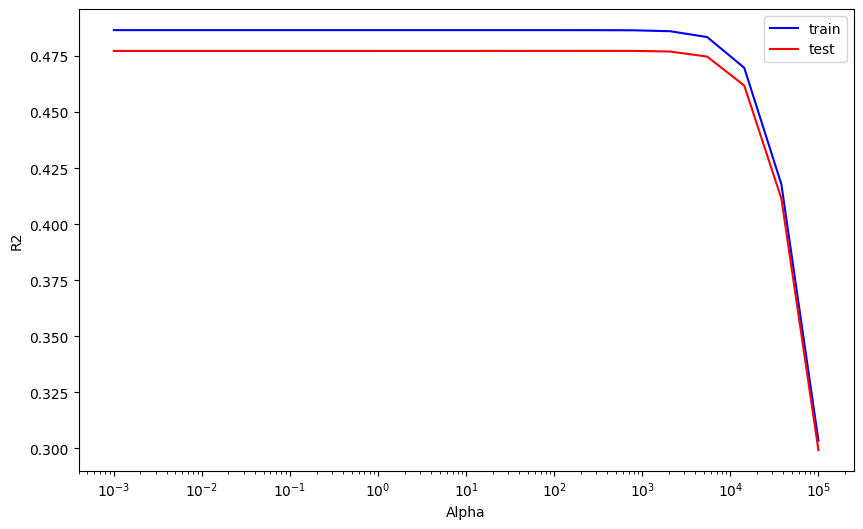

In [18]:
#Entrener con RidgeRegression
#Se busca el mejor alpha
alphas = np.logspace(-3, 5, 20)
print(alphas)
train_error = np.empty(len(alphas))
test_error = np.empty(len(alphas))
train_error_r2 = np.empty(len(alphas))
test_error_r2 = np.empty(len(alphas))
for i, alpha in enumerate(alphas):
    model = RidgeRegression(alpha=alpha)
    model.fit(X_train_pca, y_train)
    y_pred_train = model.predict(X_train_pca)
    y_pred_test = model.predict(X_test_pca)
    train_error[i] = sqrt(mean_squared_error(y_train, y_pred_train))
    test_error[i] = sqrt(mean_squared_error(y_test, y_pred_test))
    train_error_r2[i] = r2_score(y_train, y_pred_train)
    test_error_r2[i] = r2_score(y_test, y_pred_test)
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_error, color='blue', label='train')
plt.plot(alphas, test_error, color='red', label='test')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.xscale('log')
plt.legend()
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_error_r2, color='blue', label='train')
plt.plot(alphas, test_error_r2, color='red', label='test')
plt.xlabel('Alpha')
plt.ylabel('R2')
plt.xscale('log')
plt.legend()
plt.show()


In [19]:
#Seleccionar el alpha con menor RMSE. Se evidencia por la gráfica que no usar regularización es mejor. Pero para probar
#el modelo se selecciona alpha=0.001
model9 = RidgeRegression(alpha=0.001)
model9.fit(X_train_pca, y_train)
y_pred_train = model9.predict(X_train_pca)
y_pred_test = model9.predict(X_test_pca)
scores9 = get_scores(y_train, y_test, y_pred_train, y_pred_test)
print('RidgeRegression')
print(scores9)


RidgeRegression
{'MSE_train': 0.2642919743792231, 'MSE_test': 0.2686556763792392, 'RMSE_train': 0.5140933518138735, 'RMSE_test': 0.5183200520713425, 'R2_train': 0.48656752502012834, 'R2_test': 0.4772870719238962, 'MAE_train': 0.3913890374614642, 'MAE_test': 0.39398939724230286}


[1.00000000e-03 2.63665090e-03 6.95192796e-03 1.83298071e-02
 4.83293024e-02 1.27427499e-01 3.35981829e-01 8.85866790e-01
 2.33572147e+00 6.15848211e+00 1.62377674e+01 4.28133240e+01
 1.12883789e+02 2.97635144e+02 7.84759970e+02 2.06913808e+03
 5.45559478e+03 1.43844989e+04 3.79269019e+04 1.00000000e+05]


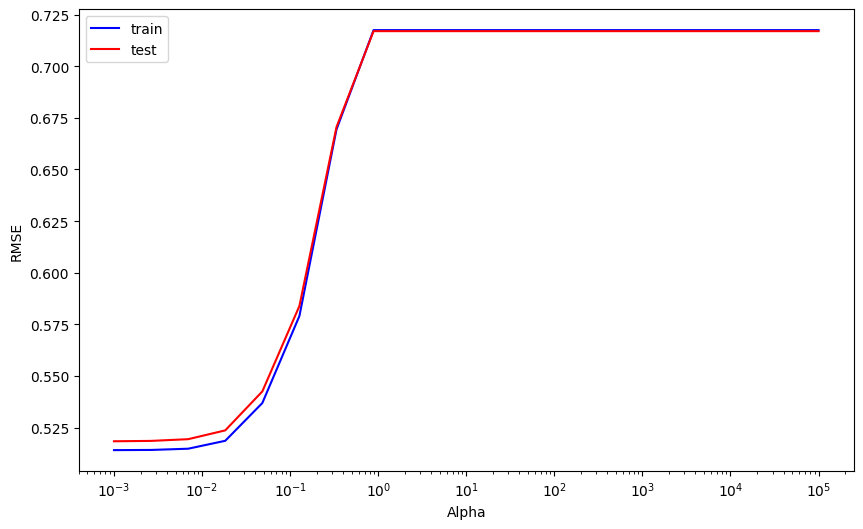

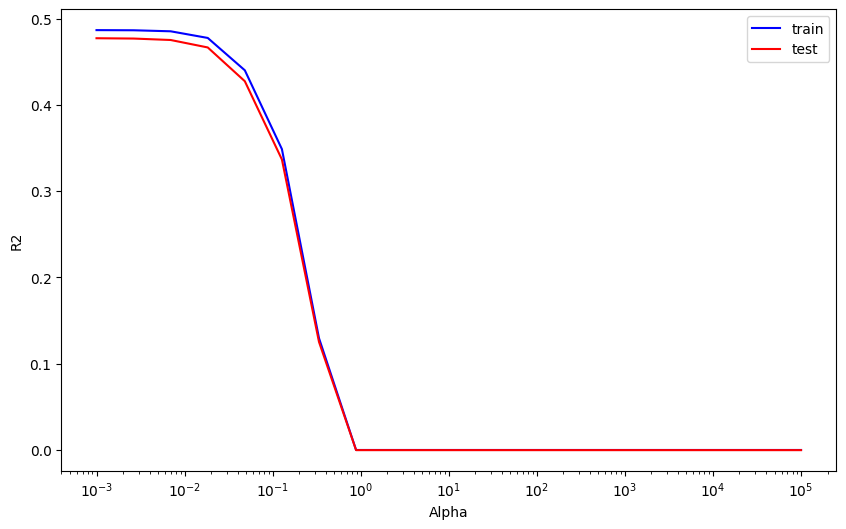

In [20]:
#Entrenar con LassoRegression
#Se busca el mejor alpha
alphas = np.logspace(-3, 5, 20)
print(alphas)
train_error = np.empty(len(alphas))
test_error = np.empty(len(alphas))
train_error_r2 = np.empty(len(alphas))
test_error_r2 = np.empty(len(alphas))
for i, alpha in enumerate(alphas):
    model = LassoRegression(alpha=alpha)
    model.fit(X_train_pca, y_train)
    y_pred_train = model.predict(X_train_pca)
    y_pred_test = model.predict(X_test_pca)
    train_error[i] = sqrt(mean_squared_error(y_train, y_pred_train))
    test_error[i] = sqrt(mean_squared_error(y_test, y_pred_test))
    train_error_r2[i] = r2_score(y_train, y_pred_train)
    test_error_r2[i] = r2_score(y_test, y_pred_test)
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_error, color='blue', label='train')
plt.plot(alphas, test_error, color='red', label='test')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.xscale('log')
plt.legend()
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_error_r2, color='blue', label='train')
plt.plot(alphas, test_error_r2, color='red', label='test')
plt.xlabel('Alpha')
plt.ylabel('R2')
plt.xscale('log')
plt.legend()
plt.show()

In [21]:
#Se observa por el gráfico que no usar regularización es mejor. Pero para probar el modelo se selecciona alpha=0.001
model10 = LassoRegression(alpha=0.001)
model10.fit(X_train_pca, y_train)
y_pred_train = model10.predict(X_train_pca)
y_pred_test = model10.predict(X_test_pca)
scores10 = get_scores(y_train, y_test, y_pred_train, y_pred_test)
print('LassoRegression')
print(scores10)


LassoRegression
{'MSE_train': 0.264306974379223, 'MSE_test': 0.2687319394630599, 'RMSE_train': 0.5141079403969783, 'RMSE_test': 0.5183936144119253, 'R2_train': 0.4865383849482712, 'R2_test': 0.4771386898000368, 'MAE_train': 0.39135019503766416, 'MAE_test': 0.3940046111184253}


In [22]:
#Tabla de resumen de cada modelo, tipo de modelo y score RMSE_test y r2_test obtenidos
resumen=pd.DataFrame({'Modelo':['LinearRegressionNormalEquation','LinearRegressionSklearn','LinearRegressionSVD',\
    'PolynomialRegression','LinearRegressionBatchGradientDescent','LinearRegressionBGDSklearn',\
    'LinearRegressionStochasticGradientDescent','LinearRegressionSGDSklearn','RidgeRegression','LassoRegression'],\
    'RMSE_test':[scores1['RMSE_test'],scores2['RMSE_test'],scores3['RMSE_test'],scores4['RMSE_test'],\
        scores5['RMSE_test'],scores6['RMSE_test'],scores7['RMSE_test'],scores8['RMSE_test'],scores9['RMSE_test'],\
            scores10['RMSE_test']],'R2_test':[scores1['R2_test'],scores2['R2_test'],scores3['R2_test'],scores4['R2_test'],\
                scores5['R2_test'],scores6['R2_test'],scores7['R2_test'],scores8['R2_test'],scores9['R2_test'],\
                    scores10['R2_test']]})
print(resumen.to_string(index=False))
#Devolver el modelo con menor RMSE
mejor_modelo=resumen.loc[resumen['RMSE_test'].idxmin()]
print('Mejor modelo:')
print(mejor_modelo)

                                   Modelo  RMSE_test  R2_test
           LinearRegressionNormalEquation   0.518320 0.477287
                  LinearRegressionSklearn   0.518320 0.477287
                      LinearRegressionSVD   0.518320 0.477287
                     PolynomialRegression   0.450071 0.605879
     LinearRegressionBatchGradientDescent   0.518320 0.477287
               LinearRegressionBGDSklearn   0.572978 0.361233
LinearRegressionStochasticGradientDescent   0.520655 0.472566
               LinearRegressionSGDSklearn   0.519649 0.474603
                          RidgeRegression   0.518320 0.477287
                          LassoRegression   0.518394 0.477139
Mejor modelo:
Modelo       PolynomialRegression
RMSE_test                0.450071
R2_test                  0.605879
Name: 3, dtype: object
